CoinAPI.io offers a free tier that consists in 100 daily requests. 

In [1]:
import os
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

#### API Authentication¶
get a free API key from CoinAPI: https://www.coinapi.io/pricing?apikey. 

My key: EE69C22E-BF60-4DCD-88A5-EF686A8E8EBF

In [2]:
API_KEY = os.environ.get('COINAPI_KEY', 'EE69C22E-BF60-4DCD-88A5-EF686A8E8EBF')

In [3]:
headers = {
    'X-CoinAPI-Key': API_KEY
}

#### Symbols

In [8]:
resp = requests.get(
    'https://rest.coinapi.io/v1/symbols',
     params={
         'filter_symbol_id': 'dash'
     },
     headers = headers)

In [9]:
symbols = resp.json()

In [10]:
symbols[:2]

[{'symbol_id': 'BITFOREX_SPOT_DASH_USDT',
  'exchange_id': 'BITFOREX',
  'symbol_type': 'SPOT',
  'asset_id_base': 'DASH',
  'asset_id_quote': 'USDT',
  'data_start': '2018-10-29',
  'data_end': '2020-06-10',
  'data_quote_start': '2018-10-29T07:17:45.8432560Z',
  'data_quote_end': '2020-06-10T01:51:38.9824342Z',
  'data_orderbook_start': '2018-10-29T07:17:45.8432560Z',
  'data_orderbook_end': '2020-05-10T21:40:07.6945968Z',
  'data_trade_start': '2018-10-29T07:13:08.1230000Z',
  'data_trade_end': '2020-06-10T01:57:51.7230000Z',
  'volume_1hrs': 27667.6073,
  'volume_1hrs_usd': 2052058.73,
  'volume_1day': 729695.6644,
  'volume_1day_usd': 54120269.44,
  'volume_1mth': 18612056.1072,
  'volume_1mth_usd': 1380424114.55,
  'price': 74.17836},
 {'symbol_id': 'BITFOREX_SPOT_DASH_BTC',
  'exchange_id': 'BITFOREX',
  'symbol_type': 'SPOT',
  'asset_id_base': 'DASH',
  'asset_id_quote': 'BTC',
  'data_start': '2018-10-29',
  'data_end': '2020-06-10',
  'data_quote_start': '2018-10-29T07:17:49

#### OHLCV (Open High Low Close Volume)

In [12]:
symbol_id = 'BITSTAMP_SPOT_BTC_USD'
period_id = '1MIN'
limit = '100'

resp = requests.get(
    f'https://rest.coinapi.io/v1/ohlcv/{symbol_id}/latest?period_id={period_id}&limit={limit}',
    headers=headers)

In [13]:
data = pd.read_json(resp.text, orient='records', dtype={
    'time_close': np.datetime64,
    'time_open': np.datetime64,
    'time_period_end': np.datetime64,
    'time_period_start': np.datetime64,
})

In [14]:
data.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2020-06-12 16:18:00,2020-06-12 16:19:00,2020-06-12 16:18:01.124,2020-06-12 16:18:32.304,9434.11,9434.11,9429.09,9433.96,1.332693,6
1,2020-06-12 16:17:00,2020-06-12 16:18:00,2020-06-12 16:17:04.180,2020-06-12 16:17:24.452,9432.51,9432.51,9426.38,9426.38,7.868103,29
2,2020-06-12 16:16:00,2020-06-12 16:17:00,2020-06-12 16:16:01.317,2020-06-12 16:16:40.823,9431.97,9439.87,9427.21,9438.25,116.417117,162
3,2020-06-12 16:15:00,2020-06-12 16:16:00,2020-06-12 16:15:43.441,2020-06-12 16:15:43.441,9428.55,9428.55,9428.55,9428.55,1.500000,1
4,2020-06-12 16:14:00,2020-06-12 16:15:00,2020-06-12 16:14:27.782,2020-06-12 16:14:27.782,9418.79,9418.79,9418.79,9418.79,0.007545,1


In [15]:
data.set_index('time_period_start', inplace=True)

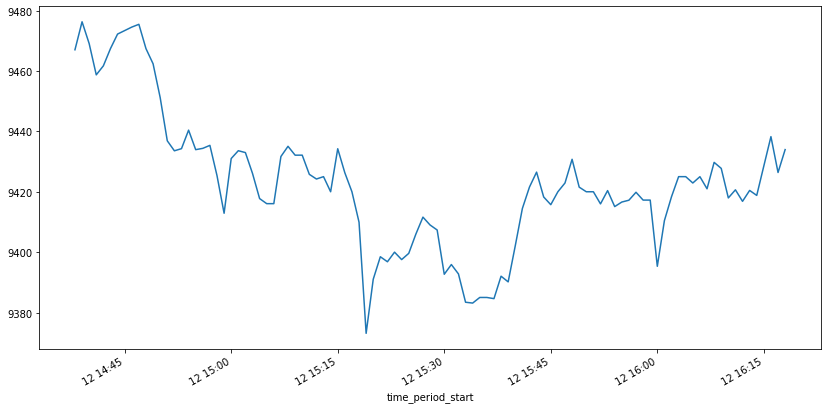

In [16]:
data['price_close'].plot(figsize=(14, 7))


#### Order Book - Latest data

In [19]:
url = 'https://rest.coinapi.io/v1/orderbooks/CATEX_SPOT_DASH_TRX/latest'
response = requests.get(url, headers=headers)

In [20]:
order = response.json()
order[:2]

[{'symbol_id': 'CATEX_SPOT_DASH_TRX',
  'time_exchange': '2020-05-10T21:46:42.9676031Z',
  'time_coinapi': '2020-05-10T21:46:42.9676031Z',
  'asks': [{'price': 5072.484166, 'size': 46.5645496},
   {'price': 5081.69014, 'size': 1.3457761},
   {'price': 5082.848837, 'size': 0.04},
   {'price': 5092.41, 'size': 31.31},
   {'price': 5095.75, 'size': 66.7474},
   {'price': 5109.34, 'size': 8.79},
   {'price': 5110.7, 'size': 19.5244},
   {'price': 5122.83, 'size': 54.0},
   {'price': 5125.44, 'size': 39.57675},
   {'price': 5125.46, 'size': 35.2127},
   {'price': 5126.377663, 'size': 28.4631},
   {'price': 5127.67, 'size': 55.374},
   {'price': 5130.43, 'size': 52.444},
   {'price': 5131.31, 'size': 41.504},
   {'price': 5135.21, 'size': 45.7},
   {'price': 5145.47, 'size': 35.0},
   {'price': 5155.44, 'size': 62.1},
   {'price': 5157.29, 'size': 38.0273},
   {'price': 5160.82, 'size': 61.27691},
   {'price': 5164.39, 'size': 51.326}],
  'bids': [{'price': 5063.859649, 'size': 0.6999522},
 

#### Order Book - History data

In [21]:
url = 'https://rest.coinapi.io/v1/orderbooks/CATEX_SPOT_DASH_TRX/history?time_start=2016-01-01T00:00:00'
res = requests.get(url, headers=headers)

In [22]:
history_order = res.json()
history_order[:2]

[{'symbol_id': 'CATEX_SPOT_DASH_TRX',
  'time_exchange': '2019-10-02T08:51:05.0424981Z',
  'time_coinapi': '2019-10-02T08:51:05.0424981Z',
  'asks': [{'price': 4984.741762, 'size': 0.792},
   {'price': 5002.646801, 'size': 0.082},
   {'price': 5017.826611, 'size': 0.854},
   {'price': 5022.29428, 'size': 0.0632},
   {'price': 5024.390479, 'size': 7.8320132},
   {'price': 5025.191897, 'size': 9.383},
   {'price': 5026.482346, 'size': 11.8093},
   {'price': 5027.053399, 'size': 0.494828},
   {'price': 5029.461961, 'size': 7.923},
   {'price': 5030.68384, 'size': 0.0643},
   {'price': 5031.056164, 'size': 0.00372},
   {'price': 5032.948216, 'size': 18.9},
   {'price': 5033.06, 'size': 3.0},
   {'price': 5033.25, 'size': 21.972},
   {'price': 5036.59, 'size': 3.0237357},
   {'price': 5039.93, 'size': 18.952752},
   {'price': 5040.59, 'size': 6.2},
   {'price': 5044.41, 'size': 10.5343923},
   {'price': 5045.0, 'size': 8.4217},
   {'price': 5045.78, 'size': 5.168}],
  'bids': [{'price': 496